In [6]:
# Importar bibliotecas necesarias para el análisis de datos y visualización
import numpy as np  # Para operaciones numéricas y generación de datos aleatorios
import pandas as pd  # Para manipulación de datos en formato DataFrame
import matplotlib.pyplot as plt  # Para crear visualizaciones
import seaborn as sns  # Para visualizaciones estadísticas mejoradas
from sklearn.preprocessing import StandardScaler, MinMaxScaler  # Para normalización de datos
from sklearn.impute import SimpleImputer  # Para manejar valores faltantes
from sklearn.preprocessing import LabelEncoder  # Para codificar variables categóricas

# Configurar el estilo de las gráficas para mejor visualización
plt.style.use('seaborn-v0_8-whitegrid')  # Aplicar estilo seaborn para gráficos más atractivos

# Cargar los datos generados "pacientes_mejorado.csv"
pacientes_df = pd.read_csv('pacientes_mejorado.csv')

print("\nPrimeras filas del dataset:")
print(pacientes_df.head())




Primeras filas del dataset:
   edad genero  presion_sistolica  presion_diastolica  frecuencia_cardiaca  \
0    52      M                NaN           66.502344            76.622002   
1    42      M          94.298305           60.000000            88.987841   
2    54      M         132.550047           84.734296            65.638090   
3    67      M          80.000000           60.000000            70.061948   
4    41      F         113.304014           61.491448            56.646877   

   temperatura      diagnostico  riesgo_cardiovascular categoria_fc  
0    37.124174  Sin diagnóstico                  False       Normal  
1    37.129329  Sin diagnóstico                  False       Normal  
2    36.399466  Sin diagnóstico                   True       Normal  
3    36.745126             Asma                  False       Normal  
4    36.960229             Asma                  False  Bradicardia  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data co



=== 1. Limpieza de datos ===

Valores faltantes antes de la limpieza:
edad                        0
genero                      0
presion_sistolica        1056
presion_diastolica          0
frecuencia_cardiaca      1034
temperatura               979
diagnostico                 0
riesgo_cardiovascular       0
categoria_fc             1034
dtype: int64


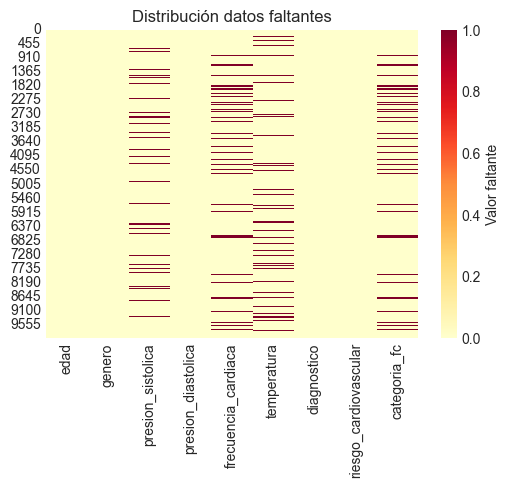


=== Valores faltantes después de la limpieza: ===
edad                        0
genero                      0
presion_sistolica           0
presion_diastolica          0
frecuencia_cardiaca         0
temperatura                 0
diagnostico                 0
riesgo_cardiovascular       0
categoria_fc             1034
dtype: int64


In [7]:
# 1. Limpieza de datos: Manejo de valores faltantes
print("\n\n=== 1. Limpieza de datos ===")
print("\nValores faltantes antes de la limpieza:")
print(pacientes_df.isnull().sum())

# Crear visualización de matriz de correlación con datos faltantes
plt.figure(figsize=(6, 4))
sns.heatmap(pacientes_df.isnull(), cmap='YlOrRd', cbar_kws={'label': 'Valor faltante'})
plt.title('Distribución datos faltantes')
plt.show()

# Imputación de valores faltantes usando la mediana para mediciones numéricas
imputer = SimpleImputer(strategy= 'median') 

# Lista de columnas numéricas que se van a imputar
columnas_numericas = ['presion_sistolica', 'presion_diastolica', 'frecuencia_cardiaca', 'temperatura']

# Aplicamos la imputación a las columnas numéricas, reemplazo de los valores faltantes
pacientes_df[columnas_numericas] = imputer.fit_transform(pacientes_df[columnas_numericas])

# imprimimos los valores faltantes
print("\n=== Valores faltantes después de la limpieza: ===")
print(pacientes_df.isnull().sum())


#### Gráfico propuesto: Countplot para las categorías de frecuencia cardíaca (categoria_fc)


=== 2. Enriquecimiento de datos ===
       presion_sistolica  presion_diastolica
count       10000.000000        10000.000000
mean          120.301907           73.872354
std            22.424175           12.755227
min            80.000000           60.000000
25%           105.113099           61.361168
50%           119.860956           71.777373
75%           134.396654           82.479314
max           200.000000          126.307305

 Nueva característica de riesgo cardio vascular
riesgo_cardiovascular
False    7955
True     2045
Name: count, dtype: int64

 Nueva categoria "categoria_fc"
categoria_fc
Normal         8193
Bradicardia    1378
Taquicardia     429
Name: count, dtype: int64


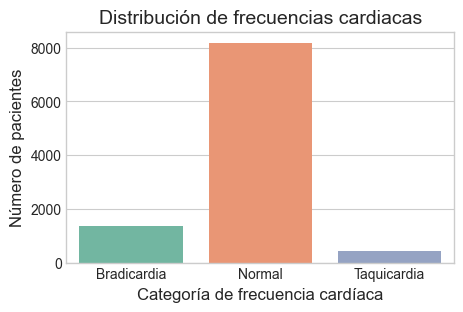

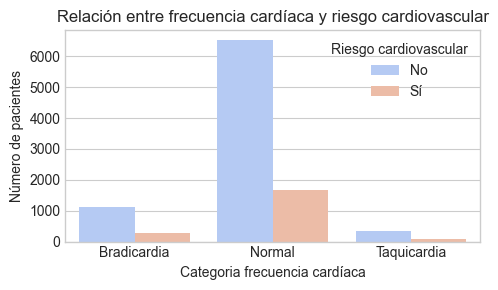

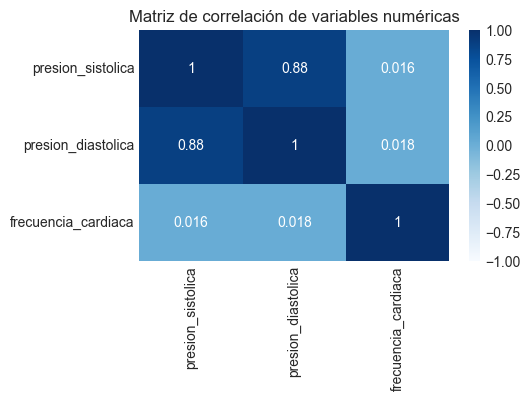

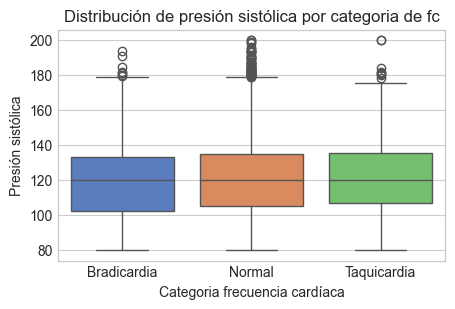

In [11]:
# 2. Enriquecimiento de datos: Crear nuevas características clínicamente relevantes
print("\n=== 2. Enriquecimiento de datos ===")

print(pacientes_df[['presion_sistolica', 'presion_diastolica']].describe())


# Calcular índice de riesgo cardiovascular basado en presión arterial
pacientes_df['riesgo_cardiovascular'] = (pacientes_df['presion_sistolica'] > 140) | \
    (pacientes_df['presion_diastolica'] > 90)  # cirterios de hipertensión


# Crear categorías de frecuencia cardíaca según rangos clínicos

bins_fc = [0, 60, 100, float('inf')]
labels_fc = ['Bradicardia', 'Normal', 'Taquicardia']
pacientes_df['categoria_fc'] = pd.cut(pacientes_df['frecuencia_cardiaca'],
                                     bins = bins_fc,
                                     labels = labels_fc)

# Mostrar la distribución de riesgo cardiovascular
print('\n Nueva característica de riesgo cardio vascular')
print(pacientes_df['riesgo_cardiovascular'].value_counts())

# Nueva categoria 
print('\n Nueva categoria "categoria_fc"')
print(pacientes_df['categoria_fc'].value_counts())

####################### Distribución de Categorías de Frecuencia Cardíaca. ####################

# Configurar el tamaño de la figura
plt.figure(figsize=(5, 3))

# Crear el countplot
sns.countplot(data = pacientes_df, x = 'categoria_fc', hue = 'categoria_fc' , palette = 'Set2' )

# Personalizar el gráfico
plt.title('Distribución de frecuencias cardiacas', fontsize = 14)
plt.xlabel('Categoría de frecuencia cardíaca', fontsize = 12)
plt.ylabel('Número de pacientes', fontsize = 12)
#plt.legend(labels_fc)

# Mostrar el gráfico
plt.show()

########################### Riesgo Cardiovascular ####################
plt.figure(figsize=(5, 3))

# Creamos el gráfico de barras para mostrar la relación entre frecuencia cardíaca y riesgo cardiovascular
sns.countplot(data = pacientes_df, x = 'categoria_fc', hue = 'riesgo_cardiovascular', palette = 'coolwarm')


# Agregar la leyenda fuera del gráfico
# plt.legend(title='Riesgo Cardiovascular', loc='upper left', bbox_to_anchor=(1, 1))
plt.title('Relación entre frecuencia cardíaca y riesgo cardiovascular')
plt.xlabel('Categoria frecuencia cardíaca')
plt.ylabel('Número de pacientes')
plt.legend(title = 'Riesgo cardiovascular', labels = ['No','Sí'])
# Ajustar para evitar solapamientos
plt.tight_layout()

plt.show()

#######################  Heatmap correlación entre variables. ###############
# Seleccionar columnas numéricas
numeric_cols = ['presion_sistolica', 'presion_diastolica', 'frecuencia_cardiaca']
matriz = pacientes_df[numeric_cols].corr()

# Crear el heatmap
plt.figure(figsize=(5, 3))
sns.heatmap(matriz, annot = True, cmap = 'Blues', vmin = -1, vmax = 1)
plt.title('Matriz de correlación de variables numéricas')

plt.show()

####################### Boxplot para presión arterial por categoría de frecuencia cardíaca ###################
plt.figure(figsize=(5, 3))

sns.boxplot(data = pacientes_df, x = 'categoria_fc', y = 'presion_sistolica', hue = 'categoria_fc', palette = 'muted', legend = False )

# Personalizamos gráfico
plt.title('Distribución de presión sistólica por categoria de fc', fontsize = 12)
plt.xlabel('Categoria frecuencia cardíaca', fontsize = 10)
plt.ylabel('Presión sistólica', fontsize = 10)

plt.show()

In [4]:
# 3. Preprocesamiento de datos
print("\n=== 3. Preprocesamiento ===")

# Crear las categorías de edad antes de la normalización


# Estandarización de variables numéricas para análisis estadístico


# Normalización usando Min-Max Scaler para variables que deben estar entre 0 y 1


# Codificación de variables categóricas para análisis numérico


print("\nEstadísticas descriptivas después del preprocesamiento:")




=== 3. Preprocesamiento ===

Estadísticas descriptivas después del preprocesamiento:


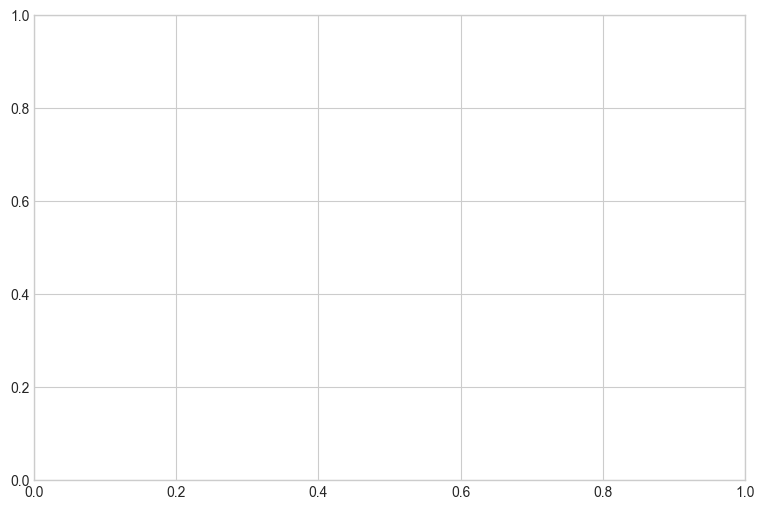

In [5]:
# Configurar tamaño de las gráficas
plt.figure(figsize=(15, 10))

# 1. Distribución de variables numéricas antes y después del preprocesamiento
# Antes del preprocesamiento


# 2. Distribución de las variables numéricas después del preprocesamiento (usando MinMaxScaler)
plt.subplot(2, 2, 3)


# Ajuste del diseño para las 4 gráficas
plt.tight_layout()

# 3. Distribución de las variables categóricas codificadas
# Visualizar la codificación de género y diagnóstico con hue para diferenciación por género


# Visualizar la distribución del diagnóstico con hue para diferenciación por diagnóstico


# Ajuste del diseño para las gráficas categóricas
plt.tight_layout()



# Graficar la distribución de los pacientes por edad y género codificado


